# Estudo com livro Ciência de dados com Python!


In [1]:
import pandas as pd #importar biblioteca pandas.

In [2]:
df = pd.read_excel("C:/Users/Danilo Macedo/Data-Science-Projects-with-Python/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls")
# carregamento o arquivo xls para trabalahr com ele no pandas, o arquivo foi atribuido ao data frame df.

### Será utilizado a função pd.shape para verificar a quantidade delinhas e colunas do arquivo carregado pelo método pd.read_excell

In [3]:
df.shape # método .shape para verificar quantidade de linhas e colunas do arquivo xls carregado.

(30000, 25)

In [4]:
df.head(5) #método .head() utilizado para visualização do dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info() # método .info possibilita a visualização das colunas com seus respectivos tipos e como se fosse o metadados do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [6]:
df.columns # método utilizado para verificar a integridade dos dados nessa nesta estapa poderá ser visualizado o nome das colunas ou seja os label

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.shape #método .shape para mostrar a quantidade de linhas e colunas do dataframe 

(30000, 25)

In [8]:
df['ID'].nunique() # método utilizado para verificar na coluna especificada ['id'] quantas são exclusivas.

29687

In [9]:
id_counts = df['ID'].value_counts()  # varável id_counts receberá os valores da coluna ID, com suas respectivas quantidade devido por conta do output
# do método  .value_counts
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [10]:
id_counts.value_counts() #o método value_coutns apresenta como saída o valor de itens distintos e valor de itens duplicados

count
1    29374
2      313
Name: count, dtype: int64

In [11]:
import numpy as np

In [12]:
dupe_mask = id_counts == 2 # cria uma variável para atribuir mascara logica onde os id que seja igual a 2 seja true
dupe_mask[0:5] # a função disso e criaar uma mascara boleana para localizar os dados duplicados.

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [13]:
id_counts.index[0:10]   # aqui estamos utilizando o .index para acessar o indice de ids

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789'],
      dtype='object', name='ID')

In [14]:
dupe_ids = id_counts.index[dupe_mask]  # criar uma variável para armazenas os ids duplicado 
dupe_ids = list(dupe_ids) # transformando os ids duplicados em uma lista 
len(dupe_ids) # contanto os itens da lista

313

In [15]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

# Filtra o DataFrame 'df' para selecionar as linhas onde a coluna 'ID' está presente nos primeiros três IDs duplicados.
# Em seguida, exibe as primeiras 10 linhas do resultado filtrado.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_zero_mask = df == 0 # pegou o dataframe e o transformou em mascara boeana para verificar posteriormente se todos elemento de uma linha são zeros pra ser excluidas.
df_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [17]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)  # conta total de linha onde exceto o primeiro item são zeros
sum(feature_zero_mask) 

315

In [18]:

df_clean_1 = df.loc[~feature_zero_mask, :].copy()

# Filtra o DataFrame 'df' para excluir as linhas onde todos os elementos (exceto o primeiro) são zeros.
# Cria uma cópia do DataFrame resultante e a armazena na variável 'df_clean_1'.

In [19]:
df_clean_1.shape

(29685, 25)

In [20]:
df_clean_1['ID'].nunique()  #verificando que as linhas com ids duplicado e zerados foram excluida no novo dataframe clean.

29685

# Explorando e Limmpando dados.

In [21]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [22]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [23]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [24]:
valid_pay_1_mask = df_clean_1['PAY_1']!='Not available'  #criando uma mascara boleana para verificar se a coluna pay_1 tem valores diferentes de 'Not available'
valid_pay_1_mask[0:5]   #exibindo os 5 primeiros valores da mascara boleana

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [25]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [26]:
sum(valid_pay_1_mask)   #contando a quantidade de valores validos   26664

26664

In [27]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()  #criando um novo dataframe com os valores validos da mascara boleana
df_clean_2.shape    #verificando a quantidade de linhas e colunas do novo dataframe 

(26664, 25)

In [28]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')  #convertendo a coluna pay_1 para inteiro    
df_clean_2[['PAY_1', 'PAY_2']].info()   #verificando se a conversão foi realizada com sucesso

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [29]:


import matplotlib.pyplot as plt #importando a biblioteca matplotlib para plotar graficos
import seaborn as sns  #importando a biblioteca seaborn para plotar graficos
import matplotlib.pyplot as plt #importando a biblioteca matplotlib para plotar graficos
import matplotlib as mpl  #importando a biblioteca matplotlib para plotar graficos 
mpl.rcParams['figure.dpi'] = 400  #definindo a resolução dos graficos


array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

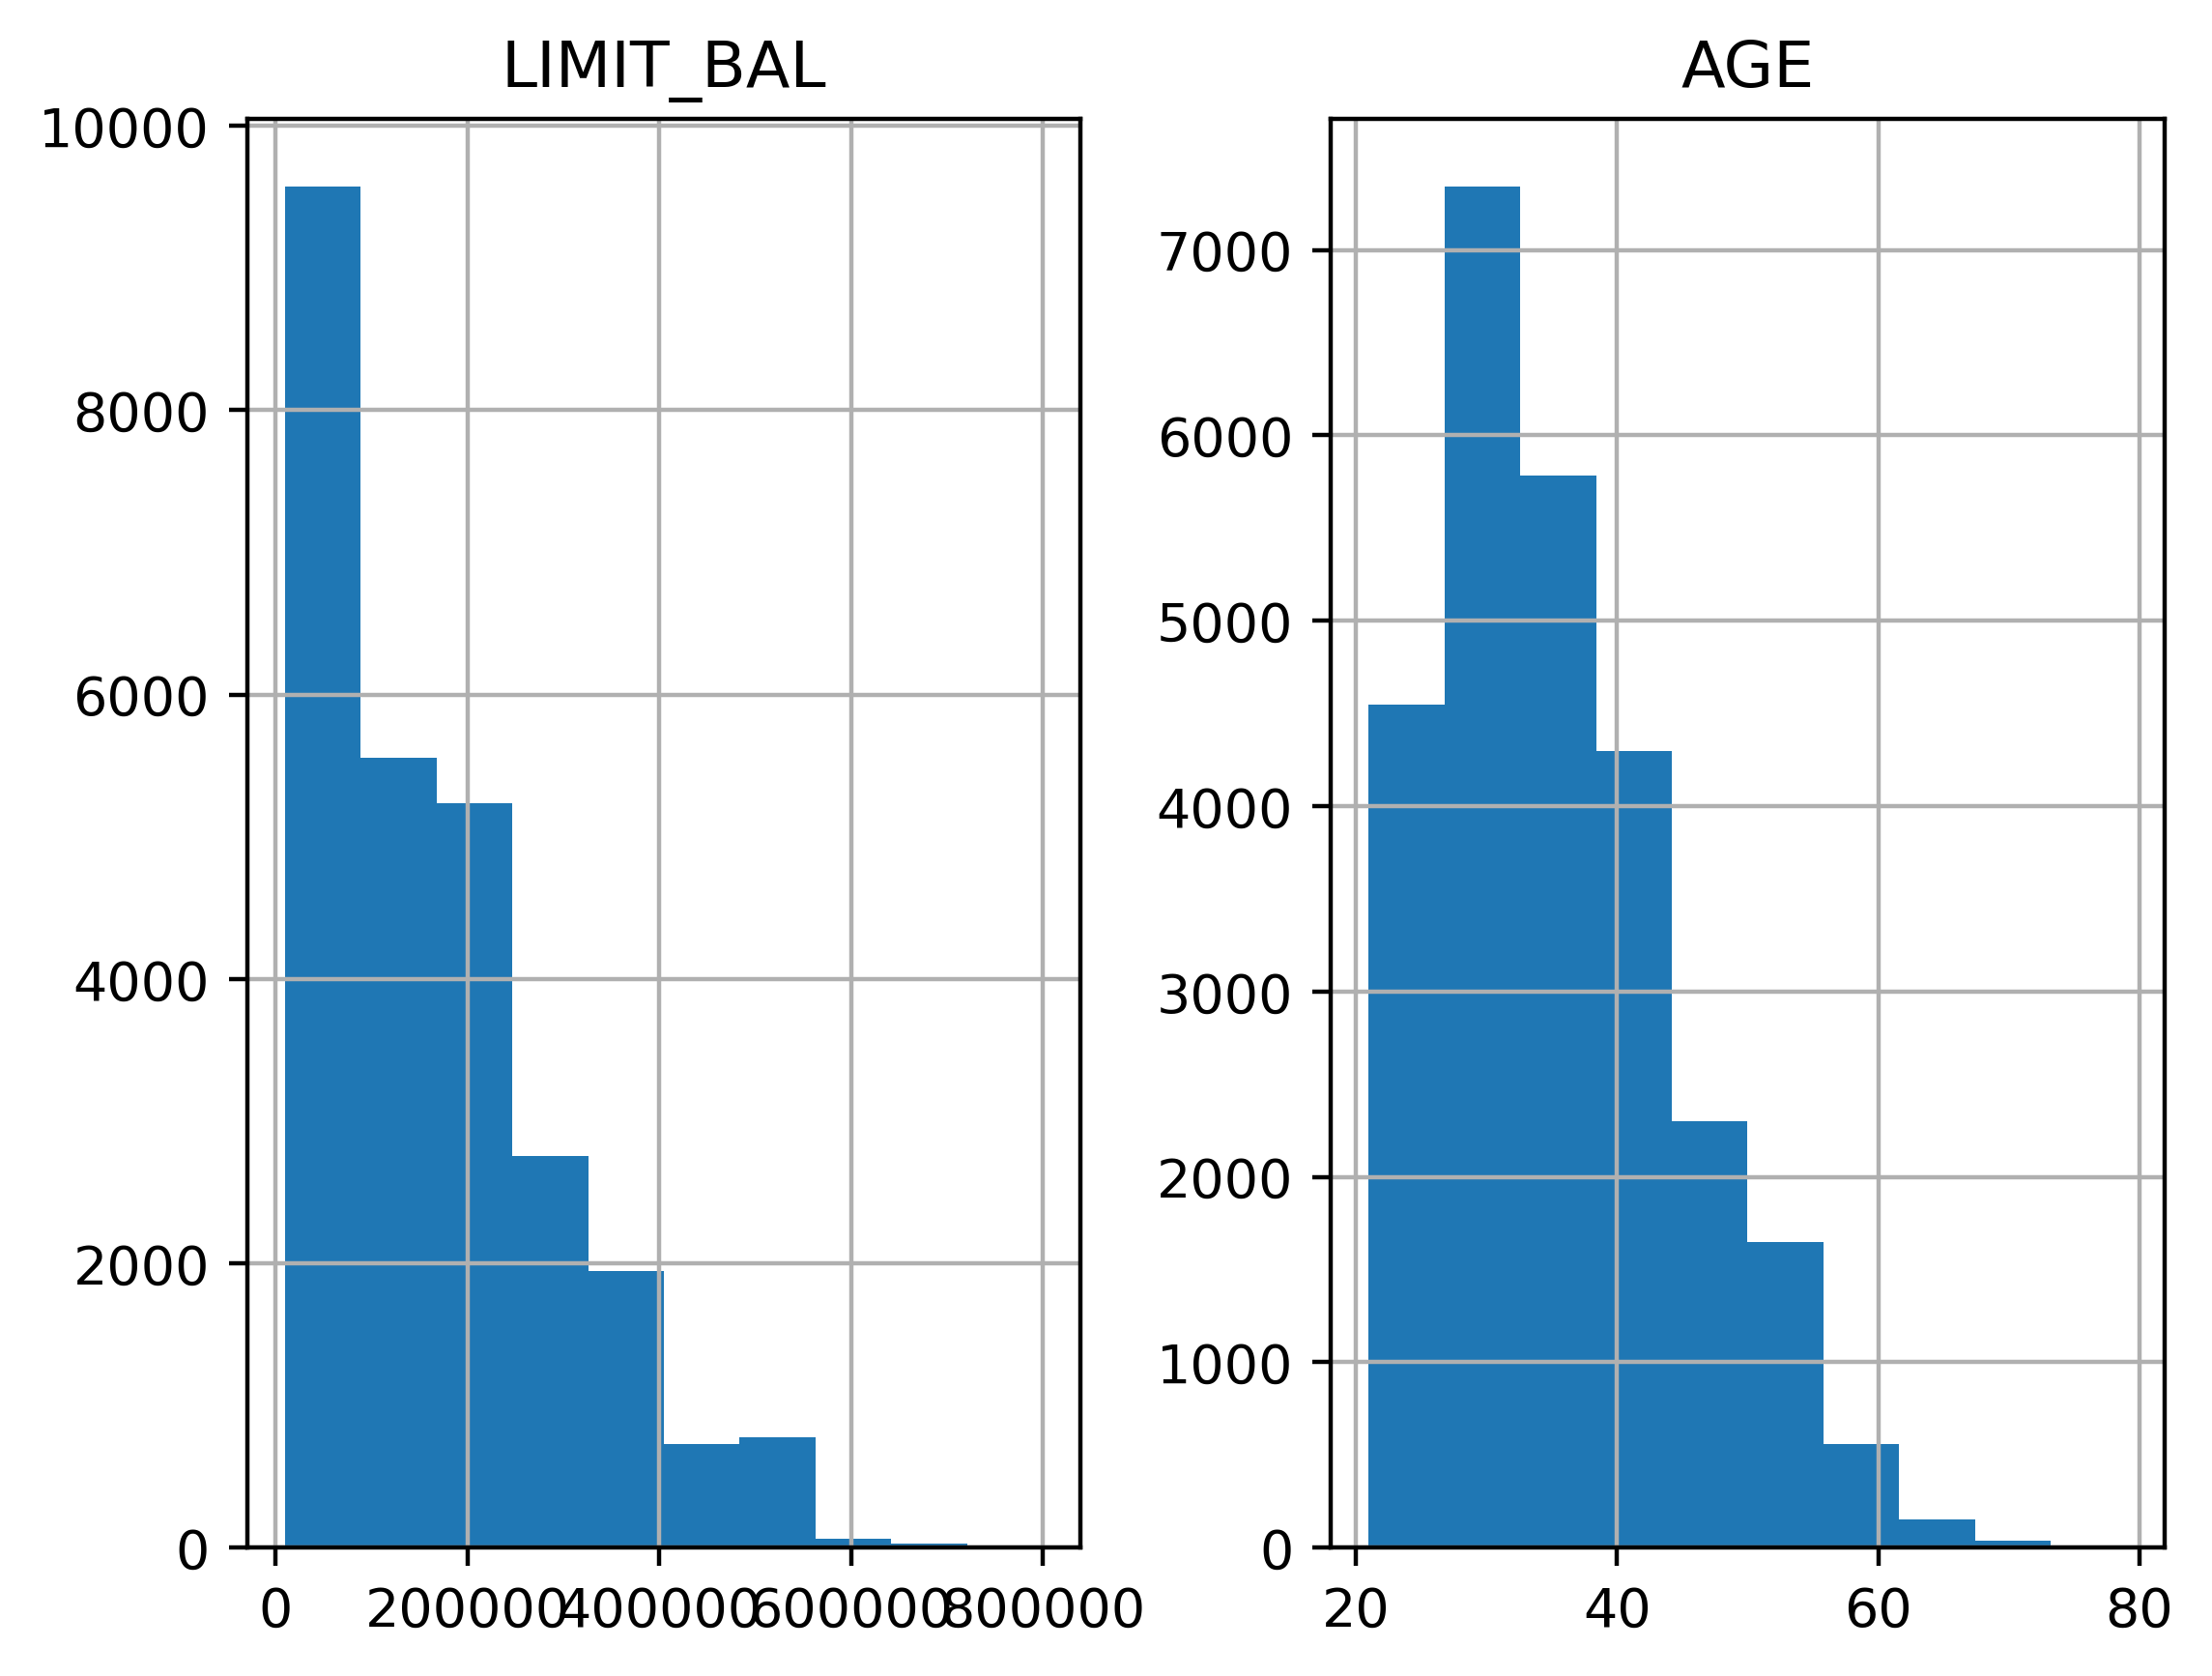

In [30]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()  # plotando histograma das colunas limit_bal e age

In [31]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()  #descrevendo as colunas limit_bal e age    

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [32]:
df_clean_2['EDUCATION'].value_counts()  #contando os valores da coluna education

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [33]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)  #substituindo os valores 0,5,6 por 4
df_clean_2['EDUCATION'].value_counts()  #contando os valores da coluna education

C:\Users\Danilo Macedo\AppData\Local\Temp\ipykernel_15672\3213138998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)  #substituindo os valores 0,5,6 por 4


EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [34]:
df_clean_2['MARRIAGE'].value_counts()  #contando os valores da coluna marriage  

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [35]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)  #substituindo o valor 0 por 3
df_clean_2['MARRIAGE'].value_counts()  #contando os valores da coluna marriage  

C:\Users\Danilo Macedo\AppData\Local\Temp\ipykernel_15672\3305551554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)  #substituindo o valor 0 por 3


MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

<Axes: xlabel='EDUCATION'>

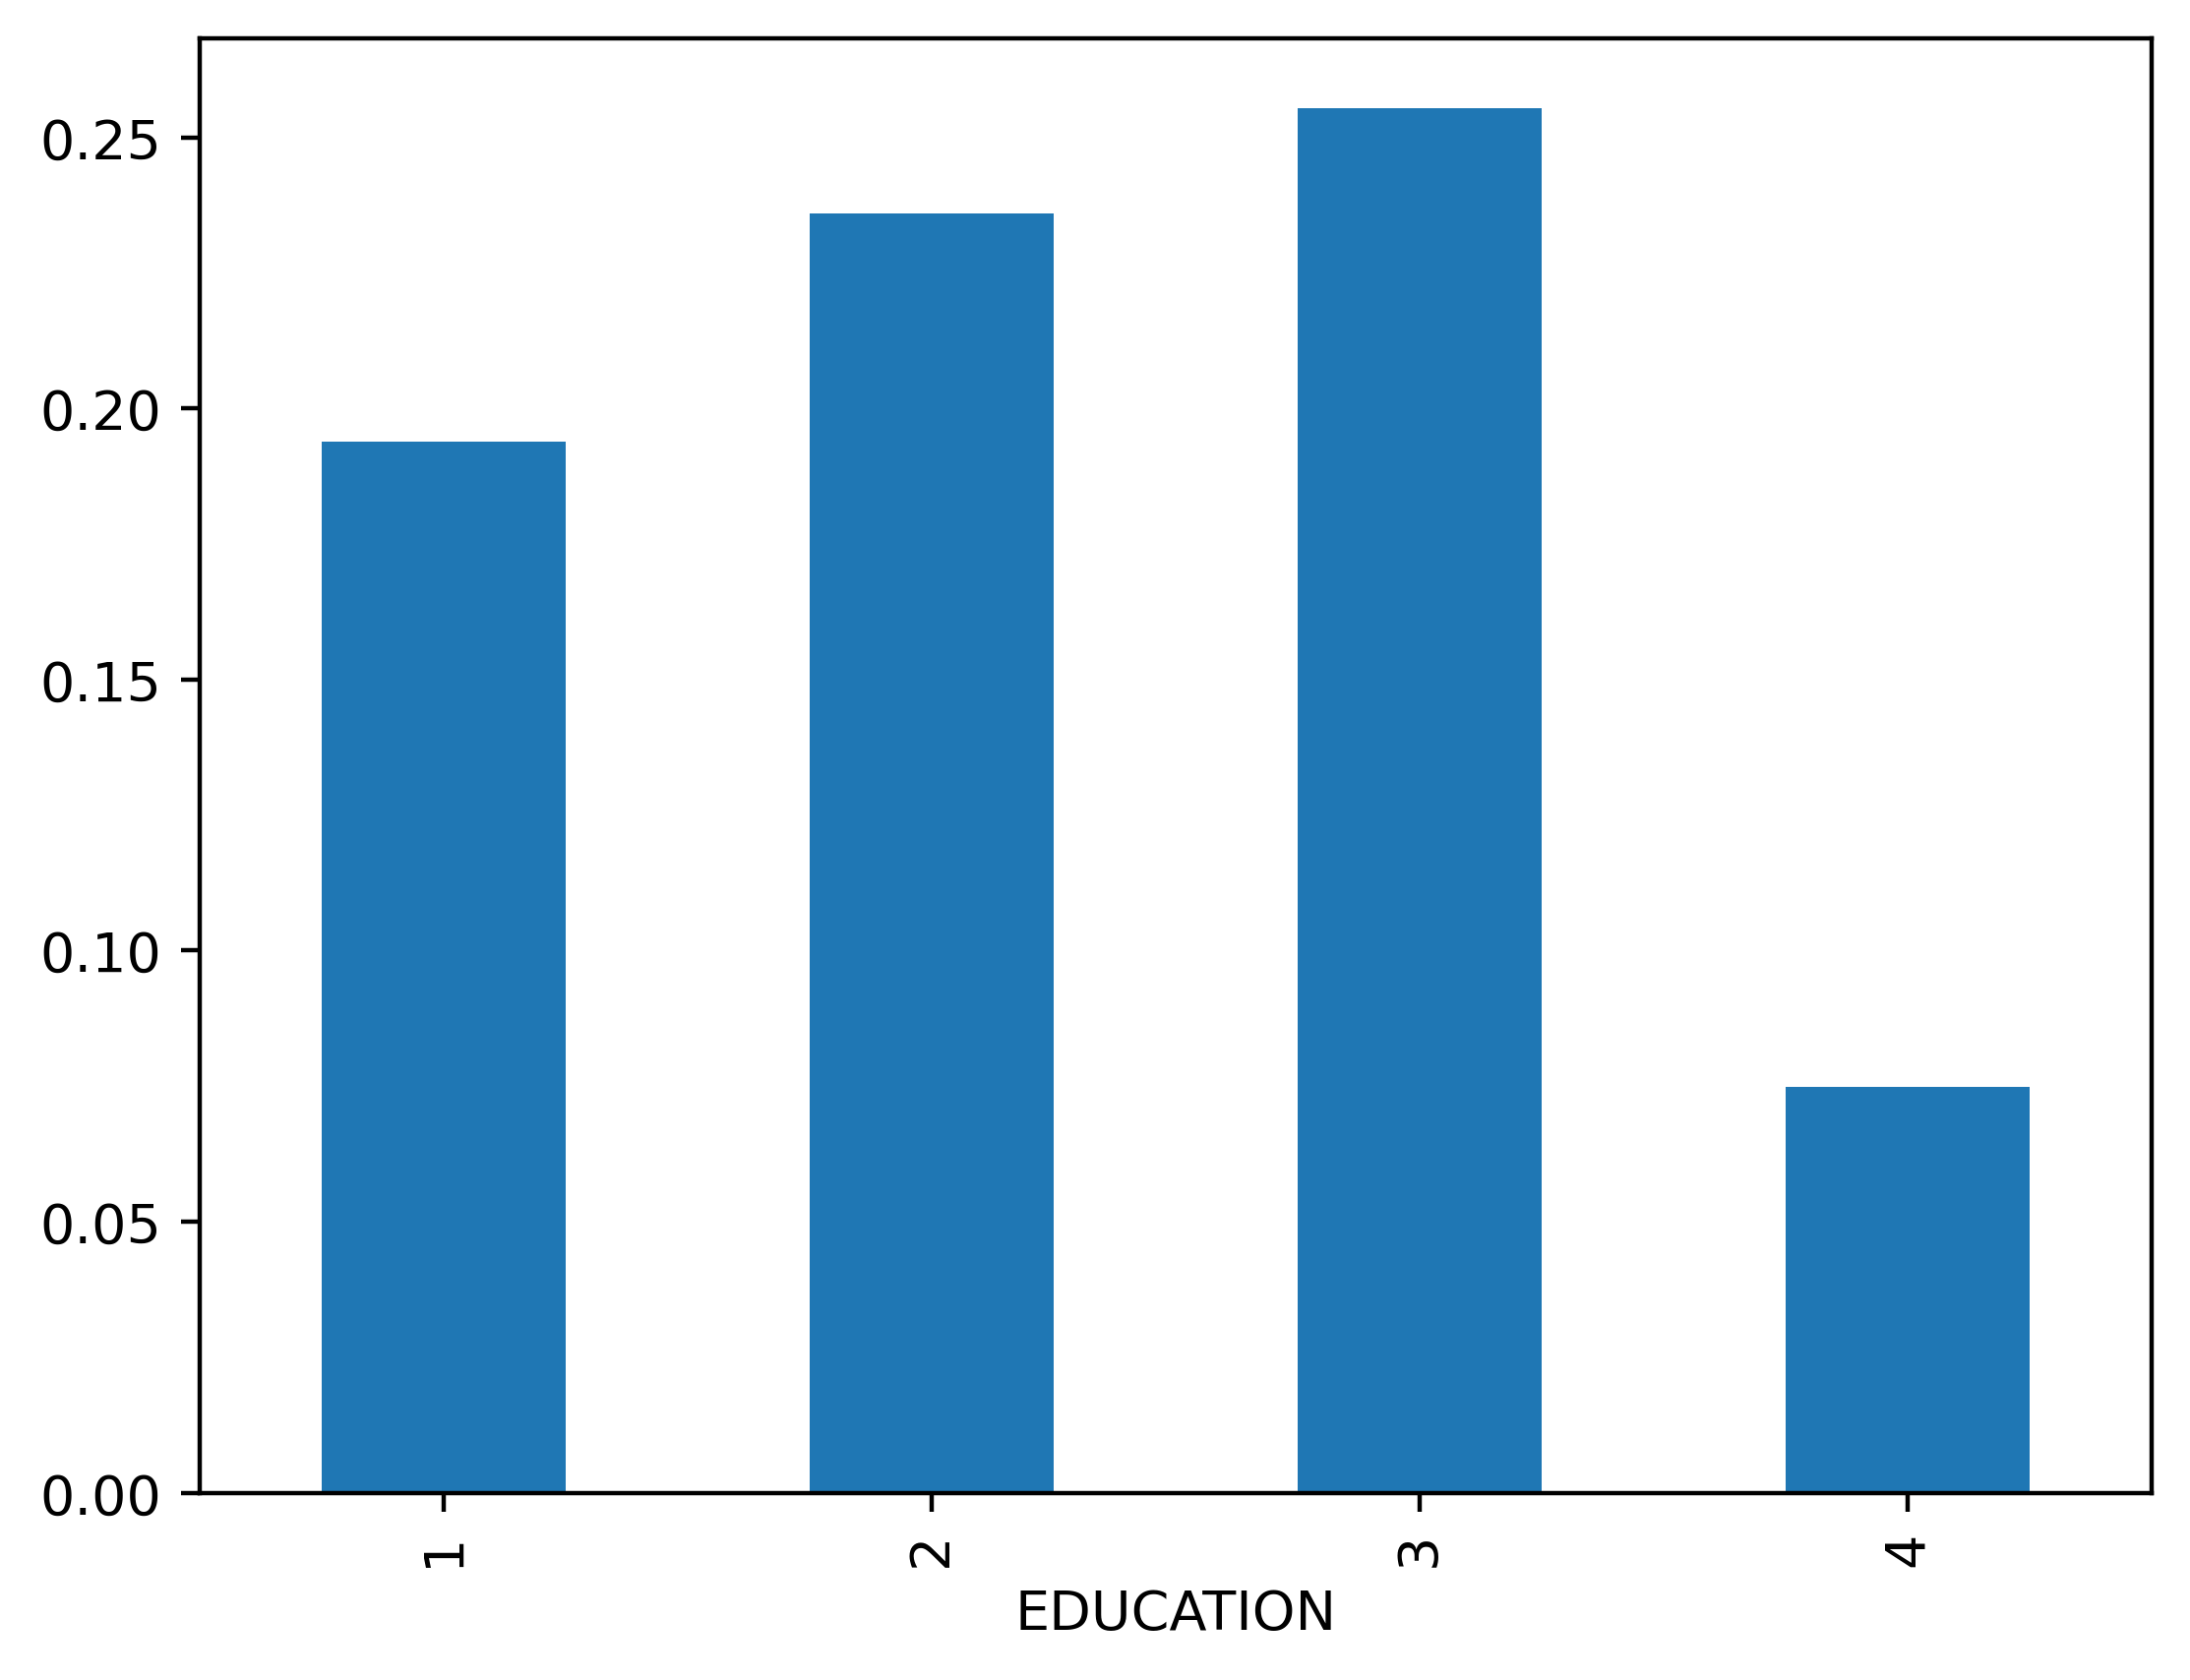

In [36]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)  #agrupando a coluna education e default payment next month e plotando um grafico de barras

In [37]:
df_clean_2['EDUCATION_CAT'] = 'none'  #criando uma nova coluna education_cat e atribuindo o valor none
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)  #exibindo as colunas education e education_cat 

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [38]:
cat_mapping = {
    1: "pos-graduado",
    2: "graduado",
    3: "ensino medio",
    4: "outros"
}

In [39]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)  #criando um dicionario para mapear os valores da coluna education para a nova coluna education_cat
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)  #exibindo as colunas education e education_cat

,EDUCATION,EDUCATION_CAT
0,2,graduado
1,2,graduado
2,2,graduado
3,2,graduado
4,2,graduado
5,1,pos-graduado
6,1,pos-graduado
7,2,graduado
8,3,ensino medio
9,3,ensino medio


In [40]:

edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])  #criando variavel edu_ohe para receber os valores da coluna education_cat
edu_ohe.head(10)  #exibindo os 10 primeiros valores da variavel edu_ohe

,ensino medio,graduado,outros,pos-graduado
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
5,False,False,False,True
6,False,False,False,True
7,False,True,False,False
8,True,False,False,False
9,True,False,False,False


In [41]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)  #concatenando o dataframe df_clean_2 com a variavel edu_ohe
df_with_ohe[['EDUCATION_CAT', 'pos-graduado', 'graduado', 'ensino medio', 'outros']].head(10)  #exibindo as colunas education_cat, pos-graduado, graduado, ensino medio, outros

,EDUCATION_CAT,pos-graduado,graduado,ensino medio,outros
0,graduado,False,True,False,False
1,graduado,False,True,False,False
2,graduado,False,True,False,False
3,graduado,False,True,False,False
4,graduado,False,True,False,False
5,pos-graduado,True,False,False,False
6,pos-graduado,True,False,False,False
7,graduado,False,True,False,False
8,ensino medio,False,False,True,False
9,ensino medio,False,False,True,False


In [42]:
df_with_ohe.to_csv('C:/Users/Danilo Macedo/Data-Science-Projects-with-Python/Data/cleaned_data.csv', index=False)  #salvando o dataframe em um arquivo csv

In [43]:
df = pd.read_csv('C:/Users/Danilo Macedo/Data-Science-Projects-with-Python/Data/cleaned_data.csv')  #carregando o arquivo csv para trabalhar com ele no pandas

In [44]:
df_with_ohe.head() #exibindo as 5 primeiras linhas do dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,ensino medio,graduado,outros,pos-graduado
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,graduado,False,True,False,False
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,graduado,False,True,False,False
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,graduado,False,True,False,False
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,graduado,False,True,False,False
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,graduado,False,True,False,False


In [45]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']  #criando uma lista com as colunas pay_1, pay_2, pay_3, pay_4, pay_5, pay_6
df[pay_feats].describe()  #descrevendo as colunas da lista pay_feats

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [46]:
df[pay_feats[0]].value_counts().sort_index()  #contando os valores da coluna pay_1 e ordenando

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

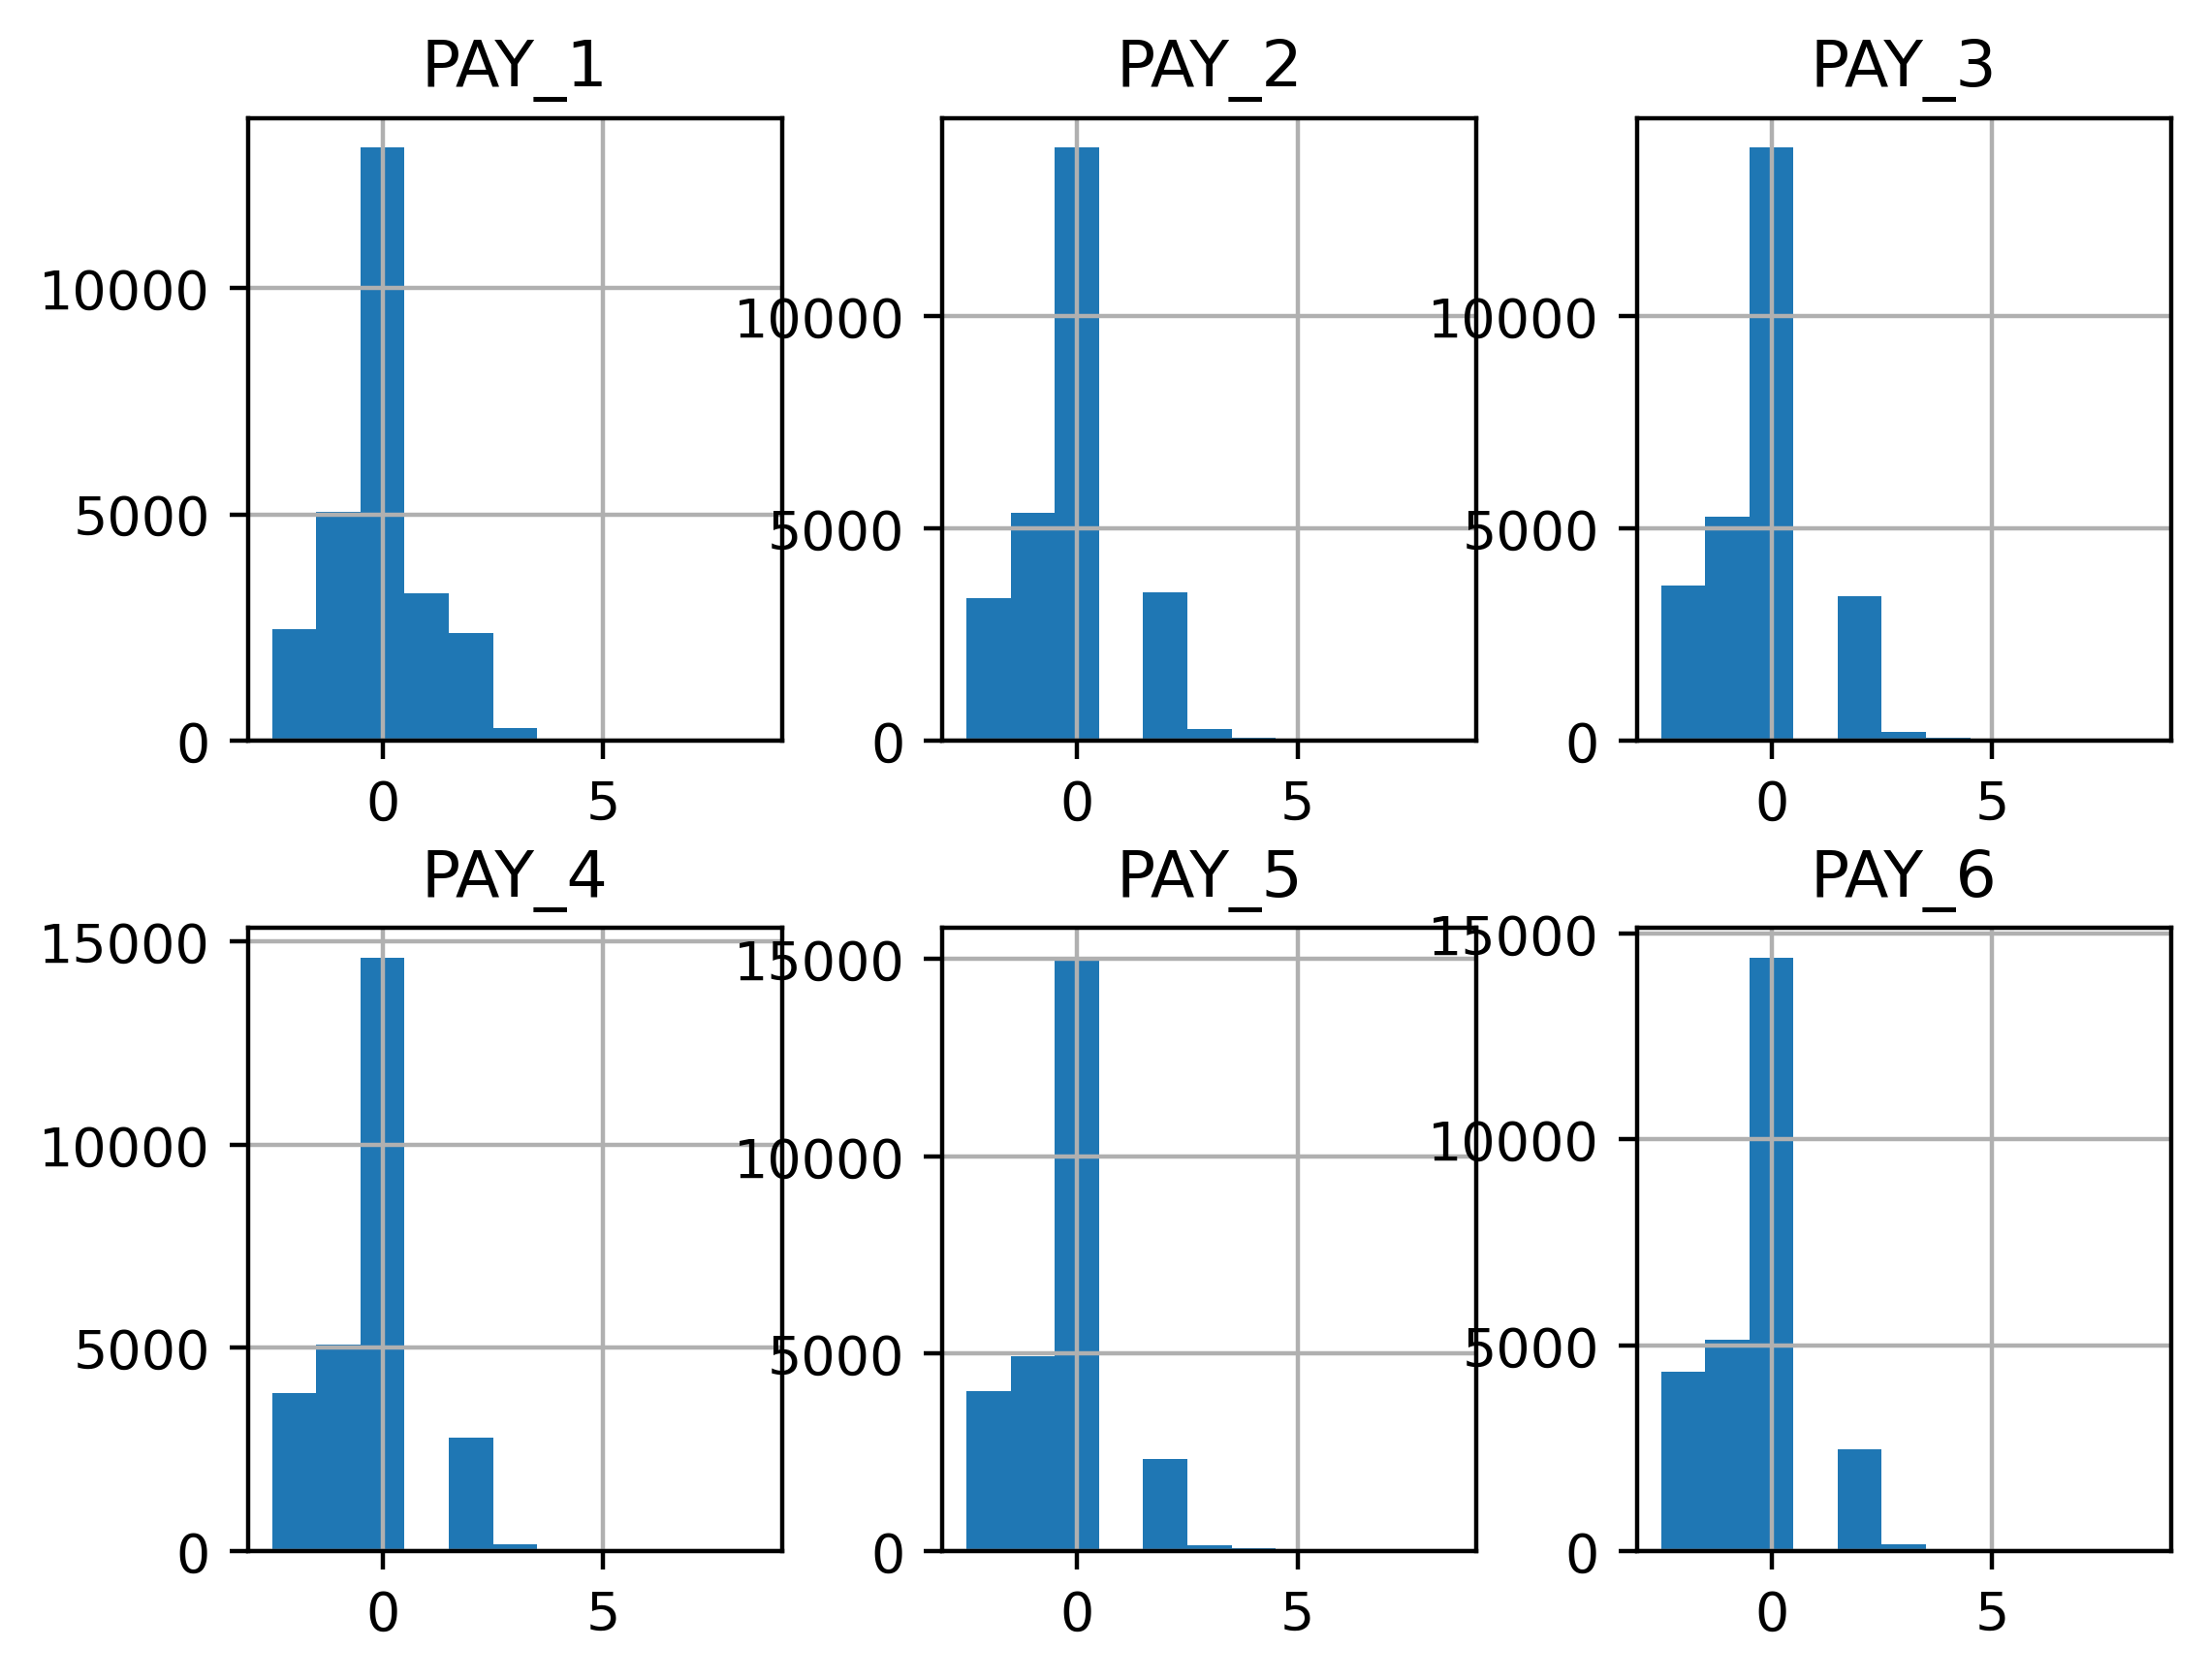

In [47]:
pay_bins = np.array(range(-2,10)) - 0.5  #criando um array com os valores de -2 a 9
df[pay_feats].hist(bins=pay_bins, layout=(2,3))  #plotando histograma das colunas da lista pay_feats

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

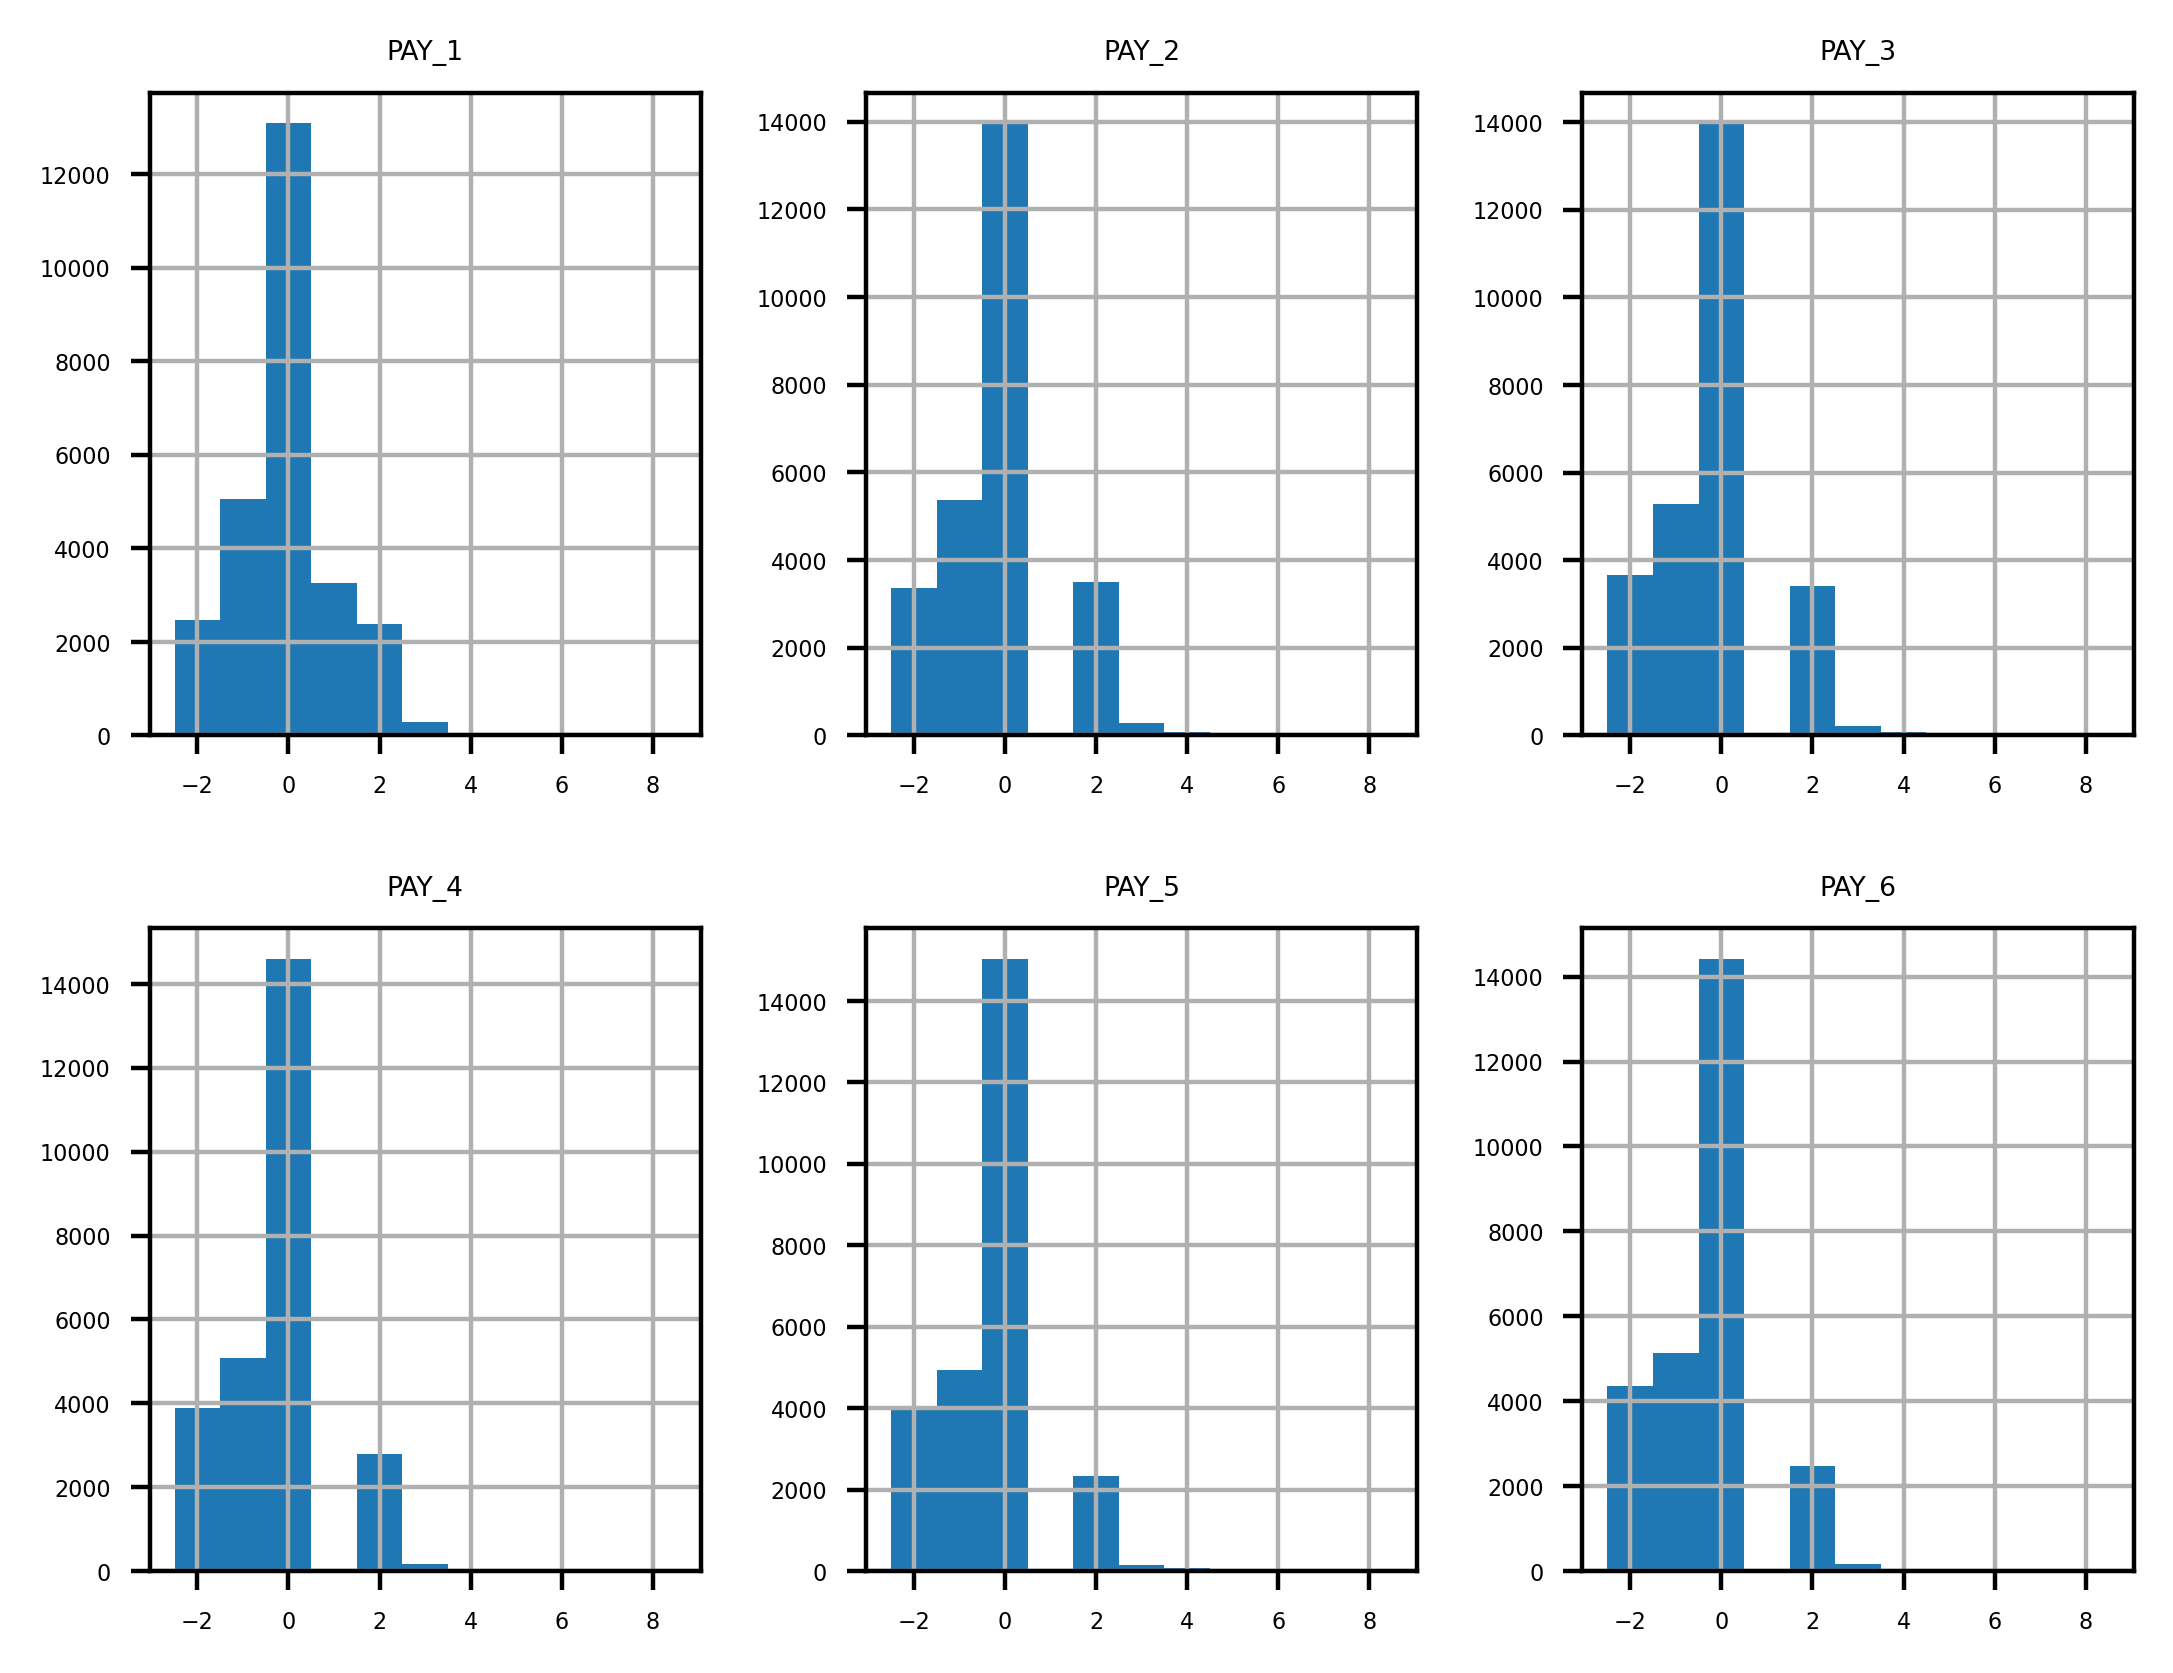

In [48]:
mpl.rcParams['font.size'] = 4  #definindo o tamanho da fonte
df[pay_feats].hist(bins=pay_bins, layout=(2,3))  #plotando histograma das colunas da lista pay_feats

In [49]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()  #localizando as linhas onde pay_2 é igual a 2 e exibindo as colunas pay_2 e pay_3

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [50]:
df['default payment next month'].mean()  #calculando a média da coluna default payment next month

0.2217971797179718

In [51]:
# como a média é 0.221797, isso significa que 22,2% dos clientes não pagaram o próximo mês.
# Portanto, se prevermos que todos os clientes paguem o próximo mês, estaremos certos 77,8% das vezes.  (1 - 0.221797)
# Portanto, a precisão da linha de base é de 77,8%.
# Se o modelo não for melhor do que isso, não será útil.
# Portanto, a precisão da linha de base é uma referência para avaliar a precisão do modelo.


In [52]:
df.groupby(by='default payment next month')['ID'].count()  #agrupando a coluna default payment next month e contando a quantidade de ids

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [53]:
from sklearn.linear_model import LogisticRegression  #importando a biblioteca LogisticRegression do sklearn
from sklearn.model_selection import train_test_split  #importando a biblioteca train_test_split do sklearn


In [54]:
my_lr = LogisticRegression(C=0.1, class_weight='balanced')  #criando um objeto my_lr da classe LogisticRegression
my_lr  #exibindo o objeto my_lr

LogisticRegression(C=0.1, class_weight='balanced')

In [55]:
my_new_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', solver='saga', tol=0.0001, verbose=0, warm_start=False, random_state=None)  #criando um objeto my_new_lr da classe LogisticRegression

In [56]:
my_new_lr  #exibindo o objeto my_new_lr

LogisticRegression(C=0.1, multi_class='auto', solver='saga')

In [57]:
x = df['EDUCATION'][0:10].values.reshape(-1,1)  #criando uma variavel x para receber os valores da coluna education
y = df['default payment next month'][0:10].values  #criando uma variavel y para receber os valores da coluna default payment next month

In [58]:
my_new_lr.fit(x, y)  #treinando o modelo com os valores de x e y

c:\Users\Danilo Macedo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Danilo Macedo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='saga')

In [59]:
new_x = df['EDUCATION'][10:20].values.reshape(-1,1)  #criando uma variavel new_x para receber os valores da coluna education
new_x  #exibindo

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [60]:
my_new_lr.predict(new_x)  #fazendo a previsão com os valores de new_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
df['default payment next month'][0:10].values  #exibindo os valores da coluna default payment next month

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
np.random.seed(seed=1)  #definindo a semente aleatória
x = np.random.uniform(low=0.0, high=10.0, size=(1000,))  #criando uma variavel x com valores aleatórios
# A função np.random.uniform() gera números aleatórios uniformemente distribuídos em um intervalo especificado.
# Os argumentos low e high definem o intervalo.
# O argumento size define a forma do array de saída.


In [76]:
x[0:10]  #exibindo os 10 primeiros valores da variavel x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [77]:
np.random.seed(seed=1)  #definindo a semente aleatória
slope = 0.25  #definindo o slope
intercept = -1.25  #definindo o intercept
y = slope * x + np.random.normal(loc=0.0, scale=1.0, size=x.shape) + intercept  #criando uma variavel y com valores aleatórios
# A função np.random.normal() gera números aleatórios de uma distribuição normal.
# O argumento loc define a média da distribuição.
# O argumento scale define o desvio padrão da distribuição.
# O argumento size define a forma do array de saída.

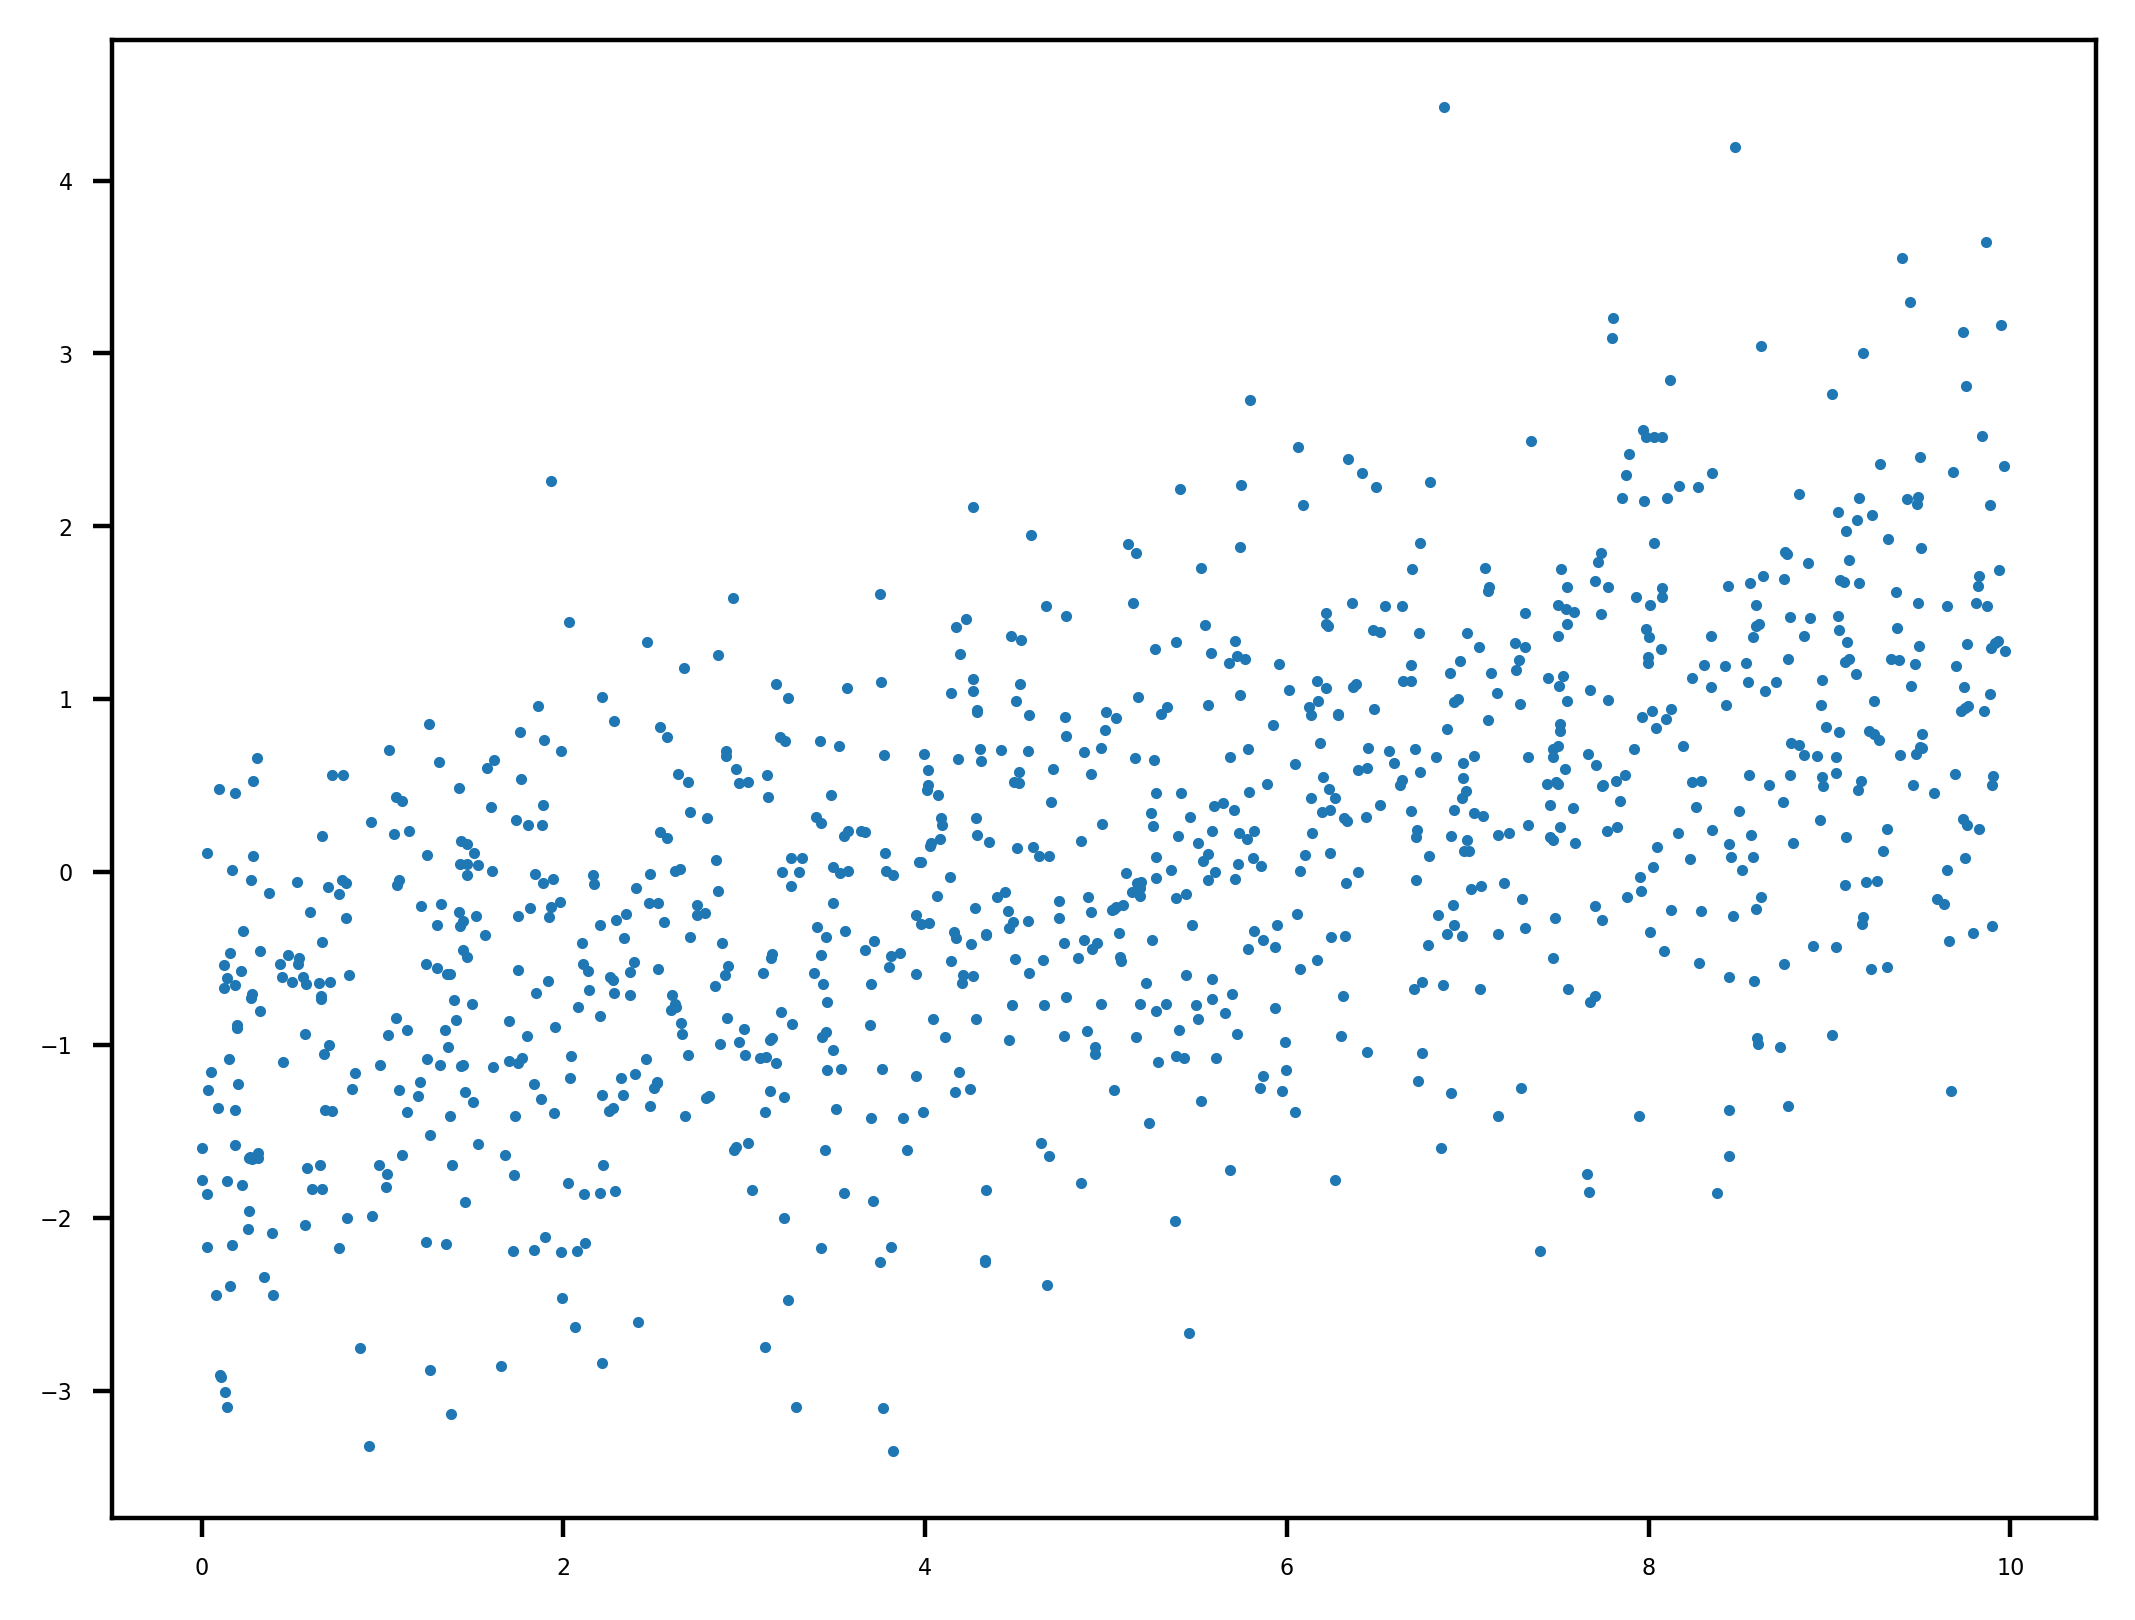

In [78]:
mpl.rcParams['figure.dpi'] = 400  #definindo a resolução dos graficos
plt.scatter(x, y, s=1)  #plotando um gráfico de dispersão


In [79]:
from sklearn.linear_model import LinearRegression  #importando a biblioteca LinearRegression do sklearn
lin_reg = LinearRegression()  #criando um objeto lin_reg da classe LinearRegression
lin_reg  #exibindo o objeto lin_reg

LinearRegression()

In [80]:
lin_reg.fit(x.reshape(-1,1), y)  #treinando o modelo com os valores de x e y
print(lin_reg.coef_)  #exibindo o coeficiente
print(lin_reg.intercept_)  #exibindo o intercept
# O coeficiente é o slope da linha de regressão.
# O intercept é o ponto onde a linha de regressão cruza o eixo y.


[0.24002588]
-1.161256600282589


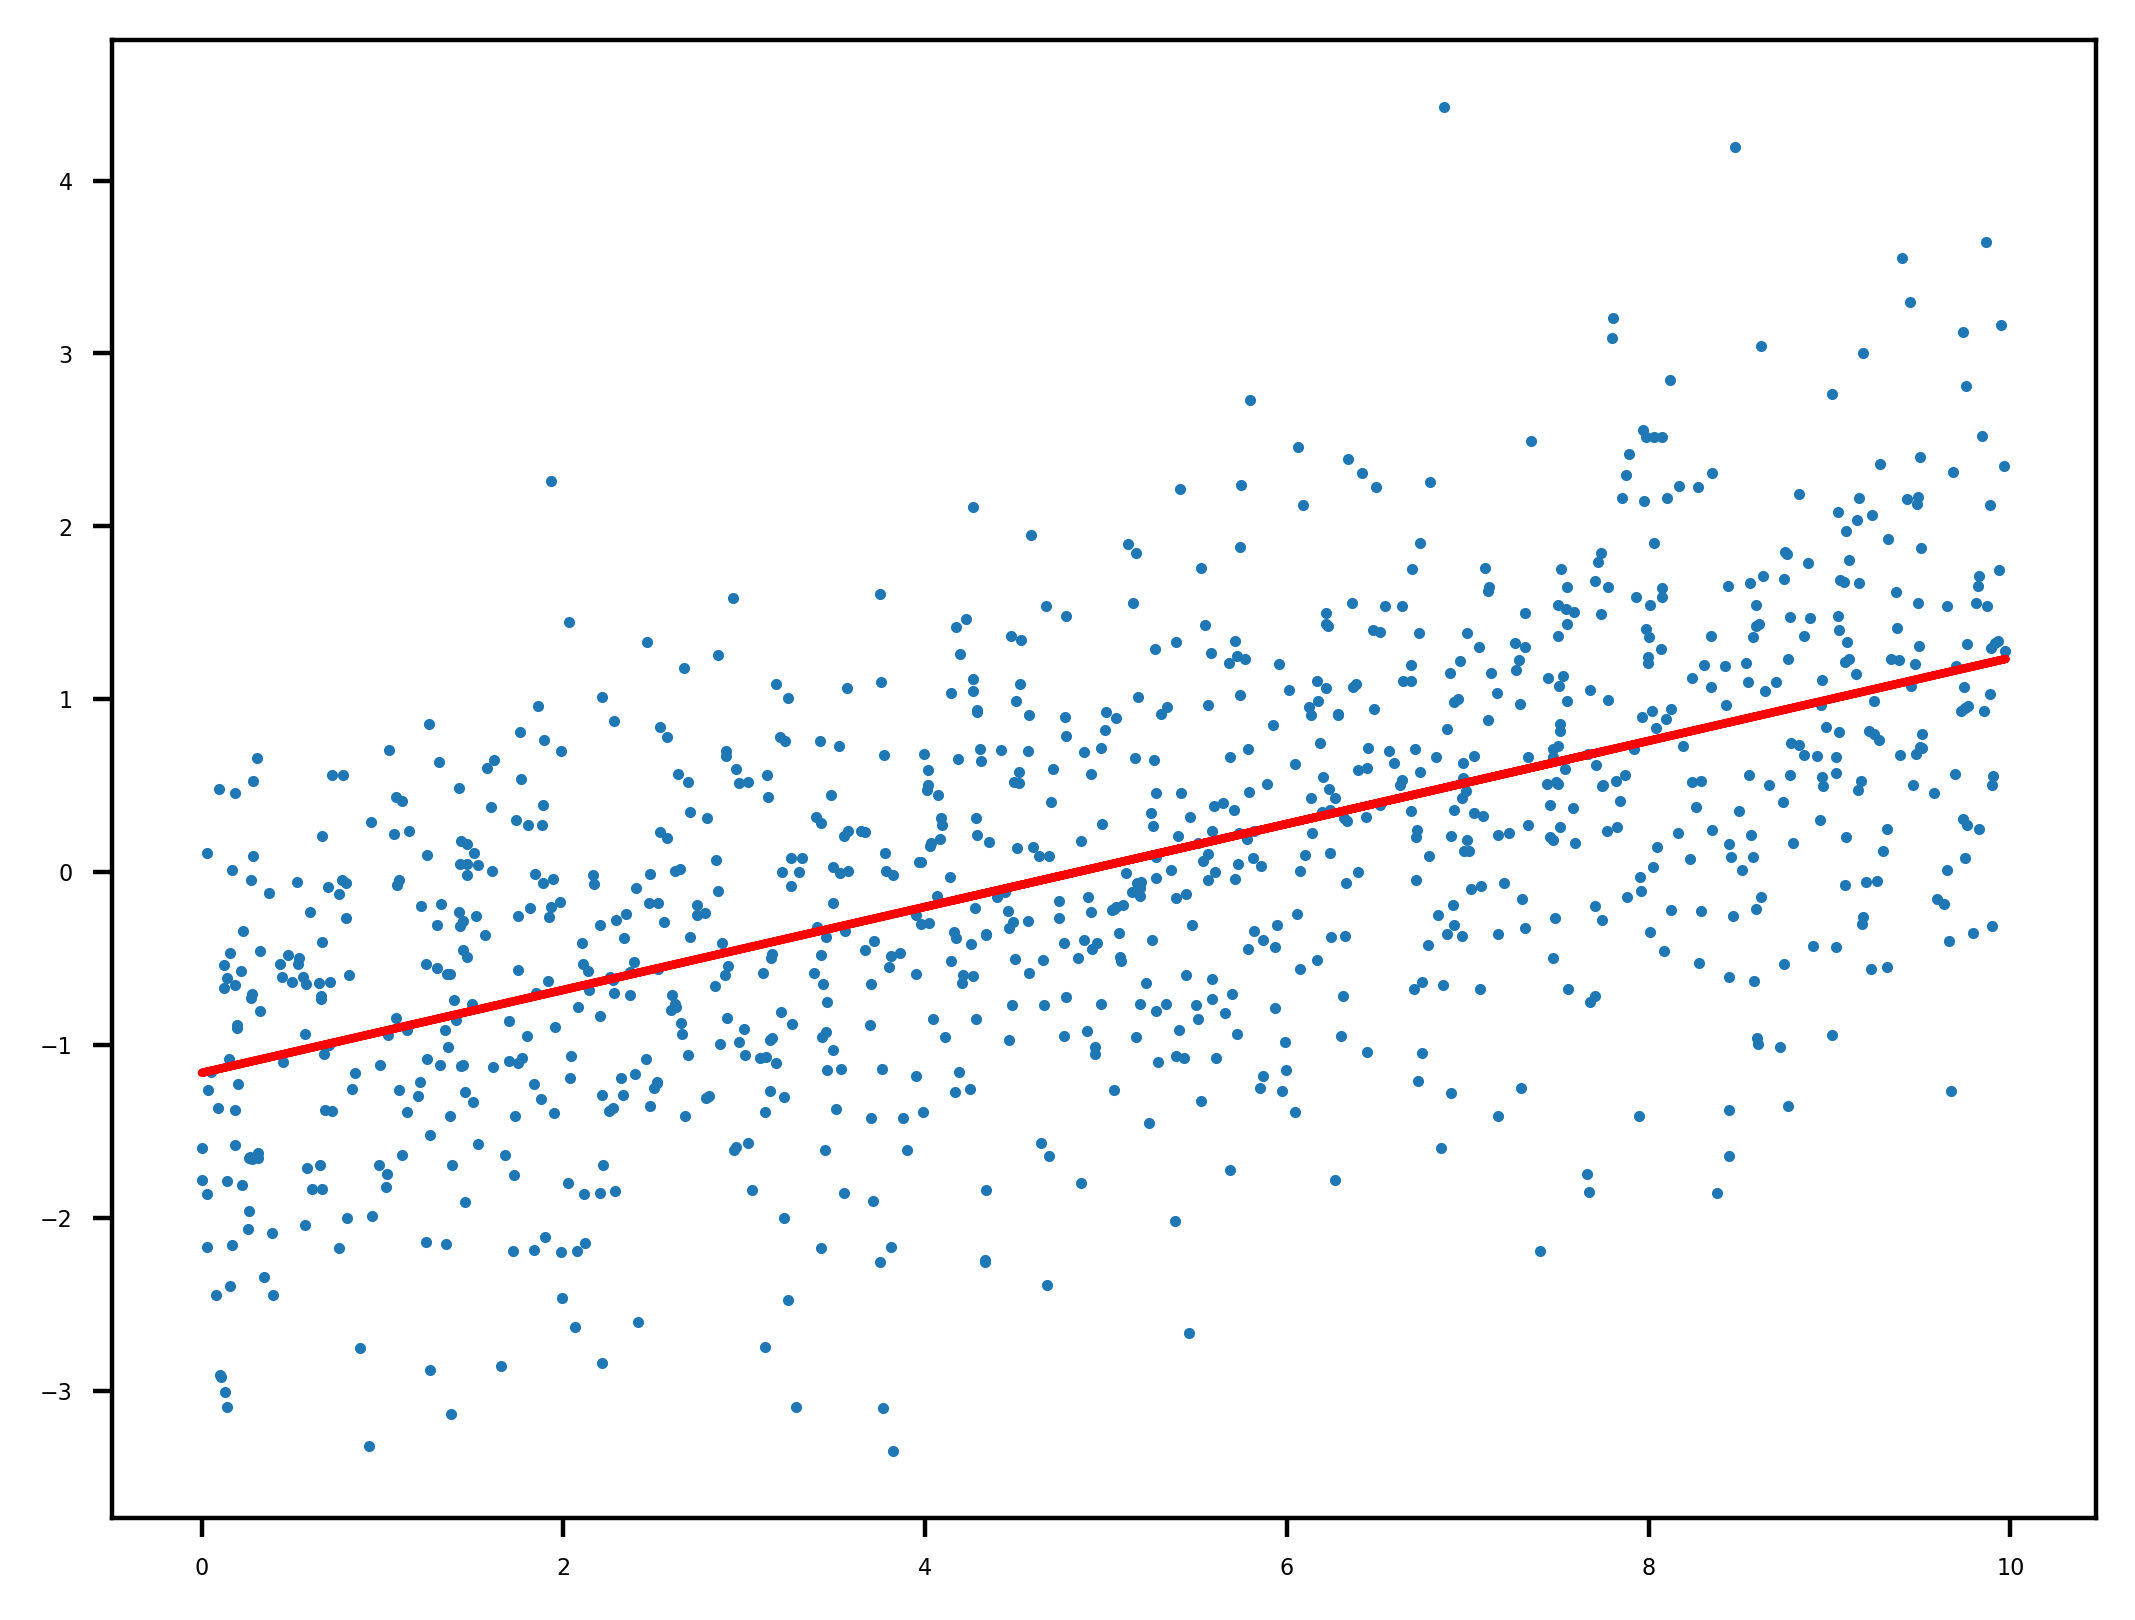

In [81]:
y_pred = lin_reg.predict(x.reshape(-1,1))  #fazendo a previsão com os valores de x
plt.scatter(x, y, s=1)  #plotando um grafico de dispersão
plt.plot(x, y_pred, color='red')  #plotando a linha de regressão    # O método .plot() é usado para plotar a linha de regressão.
# O argumento color define a cor da linha.  
# O argumento 'red' define a cor vermelha.


In [82]:
x_train, x_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)  #dividindo os dados em treino e teste
# O argumento test_size define a proporção dos dados que serão usados para teste.
# O argumento random_state define a semente aleatória.
# O método train_test_split() retorna quatro arrays: x_train, x_test, y_train, y_test.
# Os arrays x_train e y_train contêm os dados de treino.


In [83]:
print(x_train.shape)  #exibindo a forma do array x_train
print(x_test.shape)  #exibindo a forma do array x_test
print(y_train.shape)  #exibindo a forma do array y_train
print(y_test.shape)  #exibindo a forma do array y_test

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [84]:
np.mean(y_train)  #calculando a média do array y_train
np.mean(y_test)  #calculando a média do array y_test
# A média de y_train e y_test é próxima a 0,22.
# Isso significa que a divisão dos dados de treino e teste foi feita corretamente.
# A média de y_train e y_test é próxima a 0,22. 
# Isso significa que a divisão dos dados de treino e teste foi feita corretamente.

0.21657603600225014

In [85]:
from sklearn.linear_model import LogisticRegression  #importando a biblioteca LogisticRegression do sklearn
exemple_lr = LogisticRegression(C=0.1, class_weight='balanced',dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, penalty='l2')  #criando um objeto exemple_lr da classe LogisticRegression
exemple_lr  #exibindo o objeto exemple_lr   

LogisticRegression(C=0.1, class_weight='balanced')

In [86]:
exemple_lr.fit(x_train, y_train)  #treinando o modelo com os valores de x_train e y_train
# O método .fit() é usado para treinar o modelo.
# Os argumentos x_train e y_train são os dados de treino.   
# O método .fit() ajusta os parâmetros do modelo para minimizar a função de perda.


LogisticRegression(C=0.1, class_weight='balanced')

In [89]:
y_pred = exemple_lr.predict(x_test)  #fazendo a previsão com os valores de x_test
y_pred  #exibindo a previsão


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
is_correct = y_pred == y_test  #criando uma variavel is_correct para verificar se a previsão foi correta
np.mean(is_correct)  #calculando a média da variavel is_correct # A média de is_correct é a precisão do modelo.

0.4410275642227639

In [91]:
exemple_lr.score(x_test, y_test)  #calculando a precisão do modelo
# O método .score() calcula a precisão do modelo.
# Os argumentos x_test e y_test são os dados de teste.

0.4410275642227639

In [92]:
exemple_lr.predict_proba(x_test)  #fazendo a previsão da probabilidade com os valores de x_test
# O método .predict_proba() retorna a probabilidade de cada classe.
# A primeira coluna é a probabilidade de y=0.
# A segunda coluna é a probabilidade de y=1.
# A soma das duas colunas é 1.

array([[0.49658039, 0.50341961],
       [0.49658039, 0.50341961],
       [0.52072666, 0.47927334],
       ...,
       [0.52072666, 0.47927334],
       [0.52072666, 0.47927334],
       [0.52072666, 0.47927334]])

In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)  #calculando a precisão do modelo
# O método accuracy_score() calcula a precisão do modelo.
# Os argumentos y_test e y_pred são os dados de teste e as previsões.


0.4410275642227639

In [95]:
sum(y_test)  #calculando a soma de y_test
len(y_test) - sum(y_test)  #calculando a quantidade de y_test


4178

In [96]:
p = sum(y_test)
p

1155

In [ ]:
eu parei nessa etapa, pois não consegui entender o que o autor queria fazer.